In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Base/base_promotoresV2.csv')
df

,Volume,Categoria,Cliente,Código Cliente,Cnpj/Cpf Cliente,Regional,Descrição Segmentacao,Canal de Vendas,faturado,vol_medio_6,...,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,NF_COUNT,ticket_data,ticket_nf,promotor
0,1286916.00,LEITE UHT,ANCORA DISTRIBUIDORA DE ALIMENTOS L,1024744,3879760000966,REG I (CE/CAP/AS),KEY ACCOUNT REGIONAL,Auto Serv. Regional,6025642.32,330051.471667,...,0.038561,0.044107,0.025946,0.032866,70.333333,88,297,173558.391818,51424.708687,0
1,1150560.00,LEITE UHT,ARMAZEM MATEUS SA,1077724,23439441003539,REG IV (MA),OUTROS,Auto Serv. Regional,4840716.00,200184.000000,...,0.000000,0.000000,0.042081,0.000000,3.166667,24,48,225652.250000,112826.125000,0
2,1106640.00,LEITE UHT,SUPERMERCADO COMETA EIRELI,1095987,6887668003102,REG I (CE/CAP/AS),KEY ACCOUNT REGIONAL,Auto Serv. Regional,5160830.40,231497.500000,...,0.023136,0.096746,0.068230,0.000000,8.500000,48,81,188927.362500,111956.955556,0
3,945540.00,LEITE UHT,BOMPRECO SUPERMERC DO NORDESTE LTDA,1024361,13004510025840,KEY ACCOUNT GERAL,KEY ACCOUNT NACIONAL,Auto Serv. Nacional,4227696.00,283636.936667,...,0.000000,0.031585,0.018854,0.000000,57.000000,64,205,190285.876562,59406.322439,0
4,844560.00,LEITE UHT,BOMPRECO BAHIA SUPERMERCADOS LTDA,1006309,97422620000150,KEY ACCOUNT GERAL,KEY ACCOUNT NACIONAL,Auto Serv. Nacional,3740544.00,203530.675000,...,0.000000,0.038165,0.010303,0.000000,5.666667,39,86,151714.557692,68800.787791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213673,0.15,IOGURTE,JOSE GOMES DO VALE JUNIOR 017273393,1107473,31914519000109,REG I (CE/INT/SUL),TRADICIONAL 600,Pequeno varejo,3.02,64.325000,...,0.023319,0.000000,0.042493,0.000000,3.000000,8,9,306.873750,272.776667,0
213674,0.15,IOGURTE,MARIA LUCIA BARBOSA LEMOS ME,1082015,11759784000152,REG I (CE/INT/SUL),TRADICIONAL 600,Pequeno varejo,3.02,28.240000,...,0.106232,0.125885,0.095609,0.000000,3.500000,6,6,301.648333,301.648333,0
213675,0.14,IOGURTE,PADARIA BACUTTE ATHENAS EIRELI,1062293,23679005000198,REG IV (MA),PADARIA,Pequeno varejo,2.31,8.556667,...,0.000000,0.000000,0.000000,0.000000,4.500000,8,8,186.212500,186.212500,0
213676,0.14,IOGURTE,SEVERINA AVELINO DA SILVA FRANCA 02,1126143,28370597000185,REG VII (PB),TRADICIONAL 600,Pequeno varejo,2.43,23.252500,...,0.186360,0.127406,0.077411,0.000000,2.833333,6,6,306.723333,306.723333,0


In [3]:
#
df_prod = df.rename(columns={'Código Cliente':'Cliente_cod'})
df_prod = df_prod.rename(columns={'Canal de Vendas':'Canal_de_vendas'})
df_prod = df_prod.rename(columns={'Descrição Segmentacao':'Desc_seg'})
df_prod['Cliente_cod'] = df_prod['Cliente_cod'].astype(str)
#df_prod = df_prod[(df_prod.Canal_de_vendas=='Pequeno varejo') | (df_prod.Canal_de_vendas=='Atacado Regional') | (df_prod.Canal_de_vendas=='Auto Serv. Regional')]
#df_prod = df_prod[(df_prod.Desc_seg=='TRADICIONAL')]
df_prod = df_prod[(df_prod.Desc_seg=='PADARIA') | (df_prod.Desc_seg=='KEY ACCOUNT REGIONAL') | (df_prod.Desc_seg=='KEY ACCOUNT NACIONAL') 
                  | (df_prod.Desc_seg=='CASH CARRY') | (df_prod.Desc_seg=='AUTO SERVIÇO DIRETO') | (df_prod.Desc_seg=='AUTO SERVIÇO DE ROTA') 
                  | (df_prod.Desc_seg=='ATACADO DISTRIBUIDOR')]
df_prod = df_prod[(df_prod.Regional!='PRONTA ENTREGA')]
df_prod = df_prod[(df_prod.Categoria!='LEITE PASTEURIZADO')]
df_prod = df_prod[['Cliente_cod','Volume','promotor','vol_medio_6','Linha','%UHT','%PO','%CONDENSADO','%CREME','%QUEIJO'
                  ,'SKU_COUNT','DATA_COUNT','ticket_data']]
df_prod = df_prod.rename(columns={'Cliente_cod':'Cliente'})
df_prod

,Cliente,Volume,promotor,vol_medio_6,Linha,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,ticket_data
0,1024744,1286916.00,0,330051.471667,Seco,0.649856,0.038561,0.044107,0.025946,0.032866,70.333333,88,173558.391818
2,1095987,1106640.00,0,231497.500000,Seco,0.796726,0.023136,0.096746,0.068230,0.000000,8.500000,48,188927.362500
3,1024361,945540.00,0,283636.936667,Seco,0.649104,0.000000,0.031585,0.018854,0.000000,57.000000,64,190285.876562
4,1006309,844560.00,0,203530.675000,Seco,0.912098,0.000000,0.038165,0.010303,0.000000,5.666667,39,151714.557692
5,1006250,616080.00,0,133579.737500,Seco,0.777663,0.093760,0.068463,0.036787,0.000000,7.166667,36,176051.105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213635,1100772,0.17,0,212.370833,Frio,0.781652,0.000000,0.058589,0.046617,0.000000,5.666667,21,383.066667
213636,1006671,0.17,0,171.821667,Frio,0.721678,0.019400,0.000000,0.000000,0.000000,9.833333,15,543.335333
213665,1119764,0.17,0,609.640000,Frio,0.295256,0.000000,0.577300,0.126960,0.000000,3.500000,23,1871.456957
213671,1094807,0.15,0,164.920000,Frio,0.509338,0.004042,0.000000,0.000000,0.158835,4.333333,11,916.045455


In [4]:
df_stage = df_prod.pivot_table(
    values=['Volume'], index=['Cliente','promotor','vol_medio_6','%UHT','%PO','%CONDENSADO','%CREME','%QUEIJO'
                  ,'SKU_COUNT','DATA_COUNT'], columns='Linha',
    fill_value=0, aggfunc='sum')
df_stage.columns = ["_".join(tup) for tup in df_stage.columns.to_flat_index()]
df_stage = df_stage.reset_index()
df_stage = df_stage.set_index('Cliente')
for x in ['vol_medio_6']:
    q75,q25 = np.percentile(df_stage.loc[:,x],[95,5])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_stage.loc[df_stage[x] < min,x] = np.nan
    df_stage.loc[df_stage[x] > max,x] = np.nan

for x in ['Volume_Frio']:
    q75,q25 = np.percentile(df_stage.loc[:,x],[95,5])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_stage.loc[df_stage[x] < min,x] = np.nan
    df_stage.loc[df_stage[x] > max,x] = np.nan
    
df_stage = df_stage.dropna()

In [5]:
df_stage.iloc[:,10:12] = df_stage.iloc[:,10:12]/6
df_stage.iloc[:,8:9] = df_stage.iloc[:,8:9]/6
df_stage['ticket'] = df_stage['vol_medio_6']/df_stage['DATA_COUNT']

df_stage

,promotor,vol_medio_6,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,Volume_Frio,Volume_Seco,ticket
Cliente,,,,,,,,,,,,
1000214,0,129.732500,0.369992,0.015416,0.077641,0.013875,0.174731,16.333333,4.000000,232.32,91.012500,32.433125
1000317,0,108.898333,0.459144,0.000000,0.000000,0.000306,0.000000,7.000000,2.000000,314.95,56.406667,54.449167
1000525,0,139.830833,0.715150,0.009535,0.012712,0.013111,0.000000,7.500000,2.166667,124.00,119.164167,64.537308
1003653,0,906.791667,0.055139,0.007811,0.005227,0.004963,0.001084,21.000000,6.166667,5001.41,73.223333,147.047297
1005278,0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,1.000000,0.00,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1250162,0,7.224167,0.000000,0.322990,0.082016,0.009228,0.000000,2.666667,0.166667,16.03,4.552500,43.345000
1250372,0,1200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.166667,0.00,1200.000000,7200.000000
1250474,0,7.150833,0.279688,0.000000,0.248572,0.004661,0.000000,1.166667,0.166667,2.40,6.750833,42.905000


In [6]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_stage.iloc[:,1:])
df_std = pd.DataFrame(data = df_std,columns = df_stage.columns)
df_stage = df_std
df_stage

,promotor,vol_medio_6,%UHT,%PO,%CONDENSADO,%CREME,%QUEIJO,SKU_COUNT,DATA_COUNT,Volume_Frio,Volume_Seco,ticket
0,-0.525904,-0.441755,-0.291186,-0.280815,0.256878,-0.405553,5.353202,-0.146447,0.089571,-0.462087,-0.379245,-0.261523
1,-0.525904,-0.448555,0.017791,-0.419562,-0.640024,-0.608381,-0.134005,-0.697215,-0.439595,-0.438022,-0.392103,-0.250091
2,-0.525904,-0.438460,0.905043,-0.333744,-0.493178,-0.416968,-0.134005,-0.667710,-0.395498,-0.493633,-0.368785,-0.244853
3,-0.525904,-0.188158,-1.382386,-0.349259,-0.579639,-0.538775,-0.099950,0.128937,0.662834,0.926839,-0.385855,-0.202009
4,-0.525904,-0.451459,-1.573485,-0.419562,-0.640024,-0.612956,-0.134005,-1.061116,-0.704178,-0.529746,-0.375906,-0.226439
...,...,...,...,...,...,...,...,...,...,...,...,...
7717,-0.525904,-0.481737,-1.573485,2.487348,0.307428,-0.475009,-0.134005,-0.952929,-0.924664,-0.525078,-0.411370,-0.255857
7718,-0.525904,-0.092468,1.892261,-0.419562,-0.640024,-0.612956,-0.134005,-1.090621,-0.924664,-0.529746,0.032807,3.460296
7719,-0.525904,-0.481760,-0.604159,-0.419562,2.231480,-0.543275,-0.134005,-1.041446,-0.924664,-0.529047,-0.410553,-0.256086
7720,-0.525904,-0.479663,-1.573485,-0.419562,2.384819,1.368893,-0.134005,-0.972600,-0.924664,-0.517389,-0.410644,-0.236066


In [6]:
feature_cols = df_stage.columns[1:]
X = df_stage.iloc[:,1:] # Features
y = df_stage.promotor # Target variable

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1) # 70% training and 30% test

X_test = X
y_test = y


In [10]:
# Create Decision Tree classifer object
clf=RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.885910385910386


In [12]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp)

Volume_Frio    0.235449
SKU_COUNT      0.165048
DATA_COUNT     0.122330
vol_medio_6    0.093605
ticket         0.083779
Volume_Seco    0.074396
%UHT           0.060420
%CREME         0.054058
%PO            0.049282
%CONDENSADO    0.043086
%QUEIJO        0.018548
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


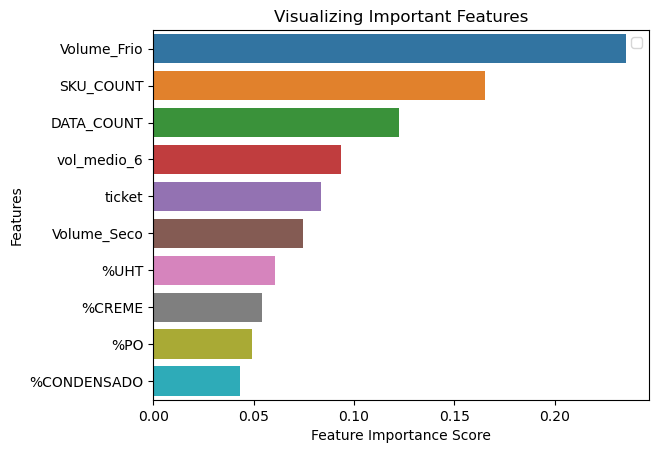

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp.iloc[:10], y=feature_imp.iloc[:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=df_stage[['Volume_Frio','vol_medio_6','SKU_COUNT','ticket','DATA_COUNT','Volume_Seco']]  # Removed feature "sepal length"
y=df_stage['promotor']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=5) # 70% training and 30% test
X_test = X
y_test = y


In [16]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)
y_prob = clf.predict_proba(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8796943796943797


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


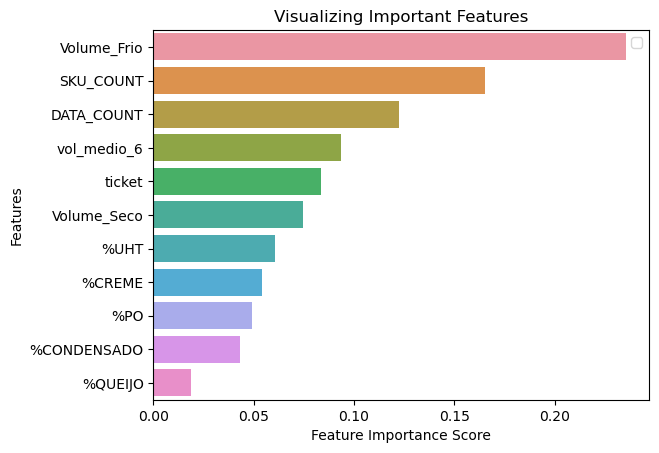

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [18]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = clf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = clf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [19]:
# Limit depth of tree to 3 levels
from sklearn.ensemble import RandomForestRegressor
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [21]:
y_test_export = pd.DataFrame(y_test).reset_index()
y_pred_export = pd.DataFrame(y_prob)
y_pred_export1 = pd.DataFrame(y_pred)


pd.concat([y_test_export,y_pred_export1,y_pred_export],axis=1).to_excel('previsão_floresta.xlsx')

In [17]:
clf.predict_proba(X)

array([[1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.95, 0.05]])